In [30]:
#the first step is to import required python libraries
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [5]:
#import boston dataset and sore it in a variable calles boston
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
#the object boston is dictionary, so we can explore the keys of this dictionary
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [7]:
boston.data.shape

(506, 13)

In [13]:
#print the featues names of boston data set.
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [14]:
#convert boston.data into pandas data frame
bos  = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
#as you can see the column names are just numbers , so we are going to replace those numbers with features names
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
#boston.target contains the housing prices
boston.target[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [19]:
#add these target prices to the bos data frame
bos['PRICE']= boston.target

In [44]:
#In this section i am going to fit a linear regression model and predict the boston housing prices. i will use the least squares method as the way to estimate the coefficients.
# Y= boston housing price (also called "target" data in python) and 
# X= all the other features (or independent variables)

# first step to import linear regression from scikit learn module then i am going to "drop" the price column as i want only the parameters as my X values
# i am going to store linear regression object in a variable called "lm"

from sklearn.linear_model import LinearRegression
X=bos.drop('PRICE', axis =1)
# this creates a Linear Regression object
lm = LinearRegression()
lm
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

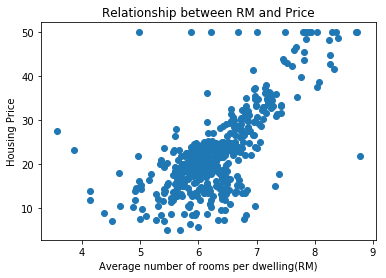

In [45]:
#important functions to keep in mind while fitting a linear regression model are :

# lm.fit() -> fits a linear model

# lm.predict() -> Predict Y using the linear model with estimated coefficients

# lm.score() -> returns the coefficient of determination.

# you can also explore the functions inside lm object by pressing lm<tab>



plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling(RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

In [46]:
# as you see there is a positive corelation between RM and hosing prices.
#predicting prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

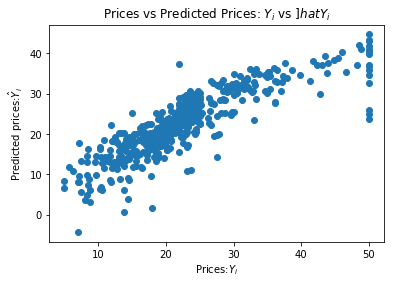

In [47]:
#then i plot a scatter plot to compare true prices and the predicted prices.
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices:$Y_i$")
plt.ylabel("Predicted prices:$\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $]hat{Y}_i$")

In [49]:
# you can notice that there is some error in the prediction as the hosung price increases

# lets calculate the mean squared error.
mseFull =np.mean((bos.PRICE - lm.predict(X))**2)
print (mseFull)

21.897779217687486


In [50]:
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']]))**2)
print(msePTRATIO)

62.65220001376927


In [53]:
#the mean squared error has increased so this shows that a single feature is not a good predictor of housing prices.

#Training and validtion data sets
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, bos.PRICE, test_size=0.33, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
#i am going to build a linear regressioin model using my train-test data sets.
lm= LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test=lm.predict(X_test)

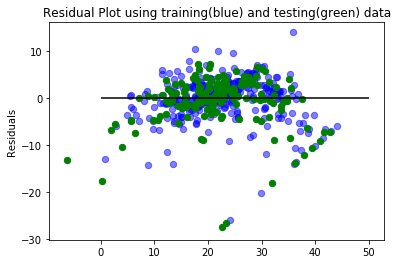

In [56]:
plt.scatter(lm.predict(X_train), lm.predict(X_train)-Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test)-Y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Residual Plot using training(blue) and testing(green) data')
plt.ylabel('Residuals')